# Link to Datacamp
https://www.datacamp.com/datalab/w/9e39d370-a314-4180-8a40-443123cb9f20/edit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv("ai_tools_comparison.csv")

# Inspect the data
trends.head()


,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [3]:
# Start coding here
trends["chatgpt"].min()


np.int64(47)

In [4]:
trends["week"] = pd.to_datetime(trends["week"])


In [5]:
trends.dtypes


week                 datetime64[ns]
chatgpt                       int64
gemini                        int64
microsoft_copilot             int64
dtype: object

In [6]:
trends.set_index("week", inplace=True)
trends.head()


,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-27,56,3,1
2023-09-03,56,3,1
2023-09-10,63,3,1
2023-09-17,64,3,1
2023-09-24,66,3,1


In [7]:
trends_pct_change = trends.pct_change()
trends_pct_change.fillna(0)
trends_pct_change.head()


,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-27,NaN,NaN,NaN
2023-09-03,0.000000,0.0,0.0
2023-09-10,0.125000,0.0,0.0
2023-09-17,0.015873,0.0,0.0
2023-09-24,0.031250,0.0,0.0


In [8]:
trends_pct_change_percent = trends_pct_change.mul(100)
trends_pct_change_percent.head()


,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-27,NaN,NaN,NaN
2023-09-03,0.000000,0.0,0.0
2023-09-10,12.500000,0.0,0.0
2023-09-17,1.587302,0.0,0.0
2023-09-24,3.125000,0.0,0.0


In [9]:
# Calculate standard deviation of percentage change (growth rates) for each tool
std_devs = trends_pct_change_percent.std()

# Find the tool with the lowest standard deviation (most consistent)
most_consistent_tool = std_devs[std_devs == std_devs.min()].index[0]

most_consistent_tool


'chatgpt'

In [10]:
# Create a copy of the original trends DataFrame
trends_raw = trends.copy()


<Axes: title={'center': 'Interest Levels Over Time'}, xlabel='week'>

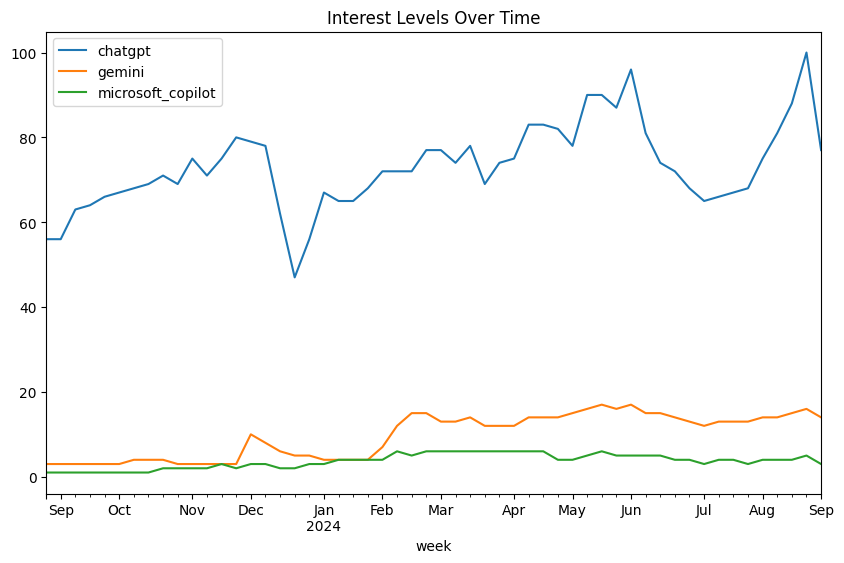

In [11]:
trends.plot(figsize=(10, 6), title="Interest Levels Over Time")


In [12]:
# Find the index (date) of the lowest point for ChatGPT
lowest_idx = trends["chatgpt"].idxmin()

# Format the date as "Month YYYY"
gpt_dip = lowest_idx.strftime("%B %Y")

gpt_dip


'December 2023'

In [16]:
# Resample the original trends data to monthly averages
monthly_avg = trends.resample("ME").mean()

# Calculate the average interest across all tools for each month
monthly_avg["all_tools_avg"] = monthly_avg.mean(axis=1)

# Find the month with the highest average interest
best_month = monthly_avg["all_tools_avg"].idxmax().strftime("%B")

best_month


'May'